In [134]:


import ast
import matplotlib.pyplot as plt
import numpy as np

arg = "0013"
end = 33.75

file_name = f"merge_data/merge_data_{arg}.txt"

# ###### funktioniert für 0001....0011 #########

def clean_data(data):
    # Filter out invalid entries
    data = ast.literal_eval(data)

    cleaned_data = []
    for row in data:
        try:
            value = int(row[1][0].strip())
            cleaned_data.append([row[0], value])
        except ValueError:
            # Skip rows with invalid integer conversion
            continue

    adjusted_data = [[(sublist[0] - end)*(-1), sublist[1]] for sublist in cleaned_data]

    return adjusted_data


# with open(file_name, "r") as f:
#     data = f.read()

# data = clean_data(data)

# # not necessary ? maybe I do everything with data
# stage_data = [sublist[0] for sublist in data]
# serial_data = [sublist[1] for sublist in data]




##################################################
# new type of data from stage with [[31.75, ['50', '52', '12.00', '0']], [33.75, ['57', '52', '11.00', '0']]] format
#### from 0012 on

with open(file_name, "r") as f:
    data = f.read()



def clean_data_new(data):   
# Convert the data to floats
    data = ast.literal_eval(data)
    
    converted_data = []
    for outer in data:
        temp = [outer[0]]  # Keep the first element as it is (already a float)
        temp.extend(float(inner) for inner in outer[1])  # Convert inner list elements to float and extend the temp list
        converted_data.append(temp)

    # check for invalid entries
    valid_data = []
    invalid_entries = []
    for i, entry in enumerate(converted_data):
        if len(entry) == 5:
            # Check if all elements can be converted to float
            try:
                temp = [float(entry[0])] + [float(x) for x in entry[1:]]
                valid_data.append(temp)
            except ValueError:
                invalid_entries.append(i)
        else:
            invalid_entries.append(i)

    print("Valid data:", valid_data)
    print("Invalid entry positions:", invalid_entries)

    return valid_data


valid_data = clean_data_new(data)

serial_data_all = list(map(list, zip(*valid_data)))

stage_data = serial_data_all[0]
PS_data = serial_data_all[1]
PS_data_avg = serial_data_all[2]
PS_data_dev = serial_data_all[3]
LASER_indicator = serial_data_all[4]

print(stage_data)




Valid data: [[31.748195383861272, 24.0, 2.4, -2.0, 1.0], [29.749785425379095, 33.0, 5.7, -5.0, 0.0], [29.557309505693844, 24.0, 8.1, -8.0, 0.0], [29.364862525404128, 26.0, 10.7, -10.0, 0.0], [29.171720999621634, 25.0, 13.2, -13.0, 0.0], [28.981733867952162, 26.0, 15.8, -15.0, 0.0], [28.788563402774134, 26.0, 18.4, -18.0, 0.0], [28.598634149895727, 27.0, 21.1, -21.0, 0.0], [28.40705535147198, 25.0, 23.6, -23.0, 0.0], [28.213827007502886, 27.0, 26.3, -24.0, 0.0], [28.02302957275851, 26.0, 26.5, -21.0, 0.0], [27.831363956148163, 26.0, 25.8, -17.0, 0.0], [27.639032733440576, 28.0, 26.2, -16.0, 0.0], [27.444212722717207, 27.0, 26.3, -13.0, 0.0], [27.254978015331574, 30.0, 26.8, -11.0, 0.0], [27.064180580587198, 31.0, 27.3, -9.0, 0.0], [26.87098117601364, 27.0, 27.4, -6.0, 0.0], [26.677723892649016, 30.0, 27.7, -4.0, 0.0], [26.486174033620802, 30.0, 28.2, -2.0, 0.0], [26.29546341706302, 31.0, 28.6, -2.0, 0.0], [26.10136689122796, 32.0, 29.2, -4.0, 0.0], [25.912334759611053, 31.0, 29.7, -3.0,

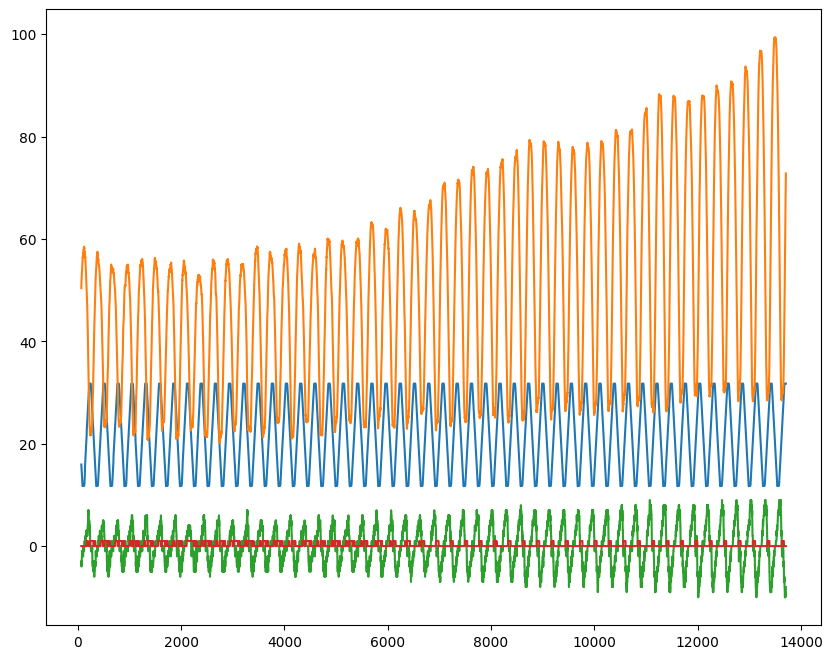

In [135]:
######## from 0012 on ##########

fig, ax = plt.subplots(figsize=(10,8))
end = len(stage_data)
x = [i for i in range(end)]

plt.plot(x[70:end], stage_data[70:end])
plt.plot(x[70:end], serial_data_all[2][70:end])
plt.plot(x[70:end], serial_data_all[3][70:end])
plt.plot(x[70:end], serial_data_all[4][70:end])




In [136]:
# find local maxima and minima
from scipy.signal import find_peaks
import numpy as np

def find_min_max_y(serial_data):
    y_max = []
    y_min = []

    max, _ = find_peaks(serial_data, prominence=5, distance=100)
    min, _ = find_peaks(-np.array(serial_data), prominence = 5, distance=100)

    for i in range(len(max)):
        y_max.append(serial_data[max[i]])

    for i in range(len(min)):
        y_min.append(serial_data[min[i]])
    
    return min, max, y_min, y_max

x_min, x_max, y_min, y_max = find_min_max_y(PS_data_avg)


Text(0.5, 0, 'Data points')

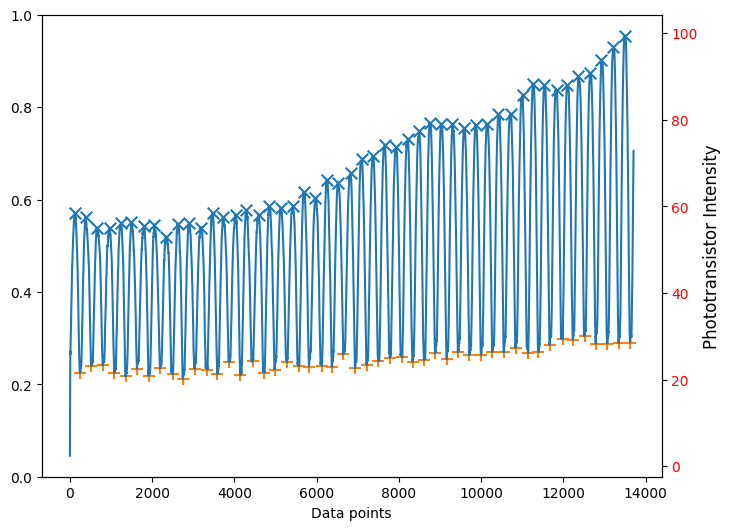

In [137]:
# Plot with stage and sensor data

x = [i for i in range (0, len(PS_data_avg))]

fig, ax1 = plt.subplots(figsize=(8,6))

# ax1.plot([i for i in range (0, len(serial_data))], stage_data, color="blue")
# ax1.set_ylabel(r"Distance to skin $[mm]$", fontsize=12, color="blue")
# for label in ax1.get_yticklabels():
#     label.set_color("blue")

ax2 = ax1.twinx()
ax2.scatter(x_max, y_max, marker = 'x', zorder = 2, s=70)
ax2.scatter(x_min, y_min, marker = '+', zorder = 2, s=70)
ax2.plot(x, serial_data_all[2])
#ax2.plot(x, serial_data, color="lightgrey", zorder =1)

ax2.set_ylabel("Phototransistor Intensity", fontsize=12)
for label in ax2.get_yticklabels():
    label.set_color("red")
    
ax1.set_xlabel(r"Data points")


In [138]:
# Read-in difference tape/no tape
freq= 200             # 200ms -> 5Hz

arg_nt_w = "0003"
arg_nt_lb = "0005"
arg_nt_db = "0004"
arg_t_w = "0013"
arg_t_lb = "0014"
arg_t_db = "0015"

file_name_nt_w = f"merge_data/merge_data_{arg_nt_w}.txt"
file_name_nt_lb = f"merge_data/merge_data_{arg_nt_lb}.txt"
file_name_nt_db = f"merge_data/merge_data_{arg_nt_db}.txt"
file_name_t_w = f"merge_data/merge_data_{arg_t_w}.txt"
file_name_t_lb = f"merge_data/merge_data_{arg_t_lb}.txt"
file_name_t_db = f"merge_data/merge_data_{arg_t_db}.txt"

# Open the data 
with open(file_name_nt_w, "r") as f:
    data_nt_w = f.read()

with open(file_name_nt_lb, "r") as f:
    data_nt_lb = f.read()

with open(file_name_nt_db, "r") as f:
    data_nt_db = f.read()

with open(file_name_t_w, "r") as f:
    data_t_w = f.read()

with open(file_name_t_lb, "r") as f:
    data_t_lb = f.read()

with open(file_name_t_db, "r") as f:
    data_t_db = f.read()

# Remove empty points ('')
# for all data below 0012 use clean_data, above clean_data_new
data_nt_w = clean_data(data_nt_w)
data_nt_lb = clean_data(data_nt_lb)
data_nt_db = clean_data(data_nt_db)
data_t_w = clean_data_new(data_t_w)
data_t_lb = clean_data_new(data_t_lb)
data_t_db = clean_data_new(data_t_db)

# Extract stage and serial data
# data[:,0]
serial_data_nt_w = [sublist[1] for sublist in data_nt_w]
serial_data_nt_lb = [sublist[1] for sublist in data_nt_lb]
serial_data_nt_db = [sublist[1] for sublist in data_nt_db]
serial_data_t_w = [sublist[1] for sublist in data_t_w]
serial_data_t_lb = [sublist[1] for sublist in data_t_lb]
serial_data_t_db = [sublist[1] for sublist in data_t_db]



# Find min/max and the y-values
x_min_nt_w, x_max_nt_w, y_min_nt_w, y_max_nt_w = find_min_max_y(serial_data_nt_w)
x_min_nt_lb, x_max_nt_lb, y_min_nt_lb, y_max_nt_lb = find_min_max_y(serial_data_nt_lb)
x_min_nt_db, x_max_nt_db, y_min_nt_db, y_max_nt_db = find_min_max_y(serial_data_nt_db)
x_min_t_w, x_max_t_w, y_min_t_w, y_max_t_w = find_min_max_y(serial_data_t_w)
x_min_t_lb, x_max_t_lb, y_min_t_lb, y_max_t_lb = find_min_max_y(serial_data_t_lb)
x_min_t_db, x_max_t_db, y_min_t_db, y_max_t_db = find_min_max_y(serial_data_t_db)



Valid data: [[31.748195383861272, 24.0, 2.4, -2.0, 1.0], [29.749785425379095, 33.0, 5.7, -5.0, 0.0], [29.557309505693844, 24.0, 8.1, -8.0, 0.0], [29.364862525404128, 26.0, 10.7, -10.0, 0.0], [29.171720999621634, 25.0, 13.2, -13.0, 0.0], [28.981733867952162, 26.0, 15.8, -15.0, 0.0], [28.788563402774134, 26.0, 18.4, -18.0, 0.0], [28.598634149895727, 27.0, 21.1, -21.0, 0.0], [28.40705535147198, 25.0, 23.6, -23.0, 0.0], [28.213827007502886, 27.0, 26.3, -24.0, 0.0], [28.02302957275851, 26.0, 26.5, -21.0, 0.0], [27.831363956148163, 26.0, 25.8, -17.0, 0.0], [27.639032733440576, 28.0, 26.2, -16.0, 0.0], [27.444212722717207, 27.0, 26.3, -13.0, 0.0], [27.254978015331574, 30.0, 26.8, -11.0, 0.0], [27.064180580587198, 31.0, 27.3, -9.0, 0.0], [26.87098117601364, 27.0, 27.4, -6.0, 0.0], [26.677723892649016, 30.0, 27.7, -4.0, 0.0], [26.486174033620802, 30.0, 28.2, -2.0, 0.0], [26.29546341706302, 31.0, 28.6, -2.0, 0.0], [26.10136689122796, 32.0, 29.2, -4.0, 0.0], [25.912334759611053, 31.0, 29.7, -3.0,

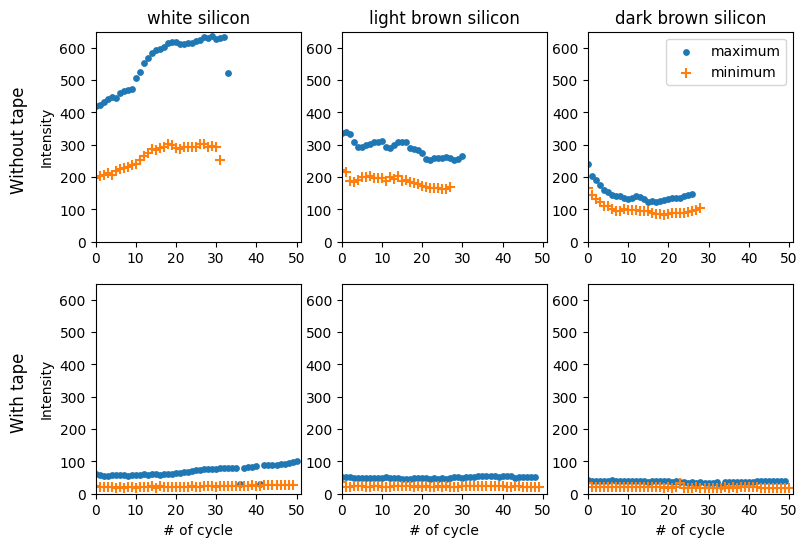

In [141]:
# Plot difference tape/no tape
plt.rcParams['font.size'] = 10

fig, ax = plt.subplots(2,3, figsize=(9,6))
size = 60

# ax[0,0].plot([i for i in range (0, len(serial_data_nt_w))], serial_data_nt_w)
ax[0,0].scatter([i for i in range(len(y_max_nt_w))], y_max_nt_w, marker = '.', zorder = 2, s=size)
ax[0,0].scatter([i for i in range(len(y_min_nt_w))], y_min_nt_w, marker = '+', zorder = 2, s=size)
# ax[0,1].plot([i for i in range (0, len(serial_data_nt_lb))], serial_data_nt_lb)
ax[0,1].scatter([i for i in range(len(y_max_nt_lb))], y_max_nt_lb, marker = '.', zorder = 2, s=size)
ax[0,1].scatter([i for i in range(len(y_min_nt_lb))], y_min_nt_lb, marker = '+', zorder = 2, s=size)
# ax[0,2].plot([i for i in range (0, len(serial_data_nt_db))], serial_data_nt_db)
ax[0,2].scatter([i for i in range(len(y_max_nt_db))], y_max_nt_db, marker = '.', zorder = 2, s=size, label = "maximum")
ax[0,2].scatter([i for i in range(len(y_min_nt_db))], y_min_nt_db, marker = '+', zorder = 2, s=size, label = "minimum")
# ax[1,0].plot([i for i in range (0, len(serial_data_t_w))], serial_data_t_w)
ax[1,0].scatter([i for i in range(len(y_max_t_w))], y_max_t_w, marker = '.', zorder = 2, s=size)
ax[1,0].scatter([i for i in range(len(y_min_t_w))], y_min_t_w, marker = '+', zorder = 2, s=size)
# ax[1,1].plot([i for i in range (0, len(serial_data_t_lb))], serial_data_t_lb)
ax[1,1].scatter([i for i in range(len(y_max_t_lb))], y_max_t_lb, marker = '.', zorder = 2, s=size)
ax[1,1].scatter([i for i in range(len(y_min_t_lb))], y_min_t_lb, marker = '+', zorder = 2, s=size)
# ax[1,2].plot([i for i in range (0, len(serial_data_t_db))], serial_data_t_db)
ax[1,2].scatter([i for i in range(len(y_max_t_db))], y_max_t_db, marker = '.', zorder = 2, s=size)
ax[1,2].scatter([i for i in range(len(y_min_t_db))], y_min_t_db, marker = '+', zorder = 2, s=size)

# set labels
ax[0,0].set(ylabel='Intensity')
ax[1,0].set(xlabel='# of cycle', ylabel='Intensity')
ax[1,1].set(xlabel='# of cycle')
ax[1,2].set(xlabel='# of cycle')

# set titles
ax[0,0].set_title('white silicon')
ax[0,1].set_title('light brown silicon')
ax[0,2].set_title('dark brown silicon')
fig.text(0.04, 0.7, 'Without tape', va='center', ha='center', rotation='vertical', fontsize=12)
fig.text(0.04, 0.28, 'With tape', va='center', ha='center', rotation='vertical', fontsize=12)

ax[0,2].legend(loc="upper right")

for axis in ax.flat:
    axis.set_ylim([0,650])   
    axis.set_xlim([0,51])
    axis.set_xticks([0,10,20,30,40,50])